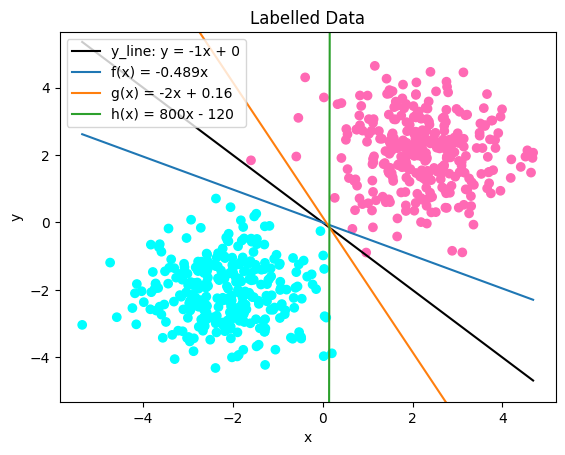

Differences in classification compared to my line:
f(x): 1 points
g(x): 1 points
h(x): 6 points

Total seperation count of pink and cyan points:
y_line: 302 points are pink, out of 600 points
f(x): 301 points are pink, out of 600 points
g(x): 301 points are pink, out of 600 points
h(x): 298 points are pink, out of 600 points


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Läser in data
data = pd.read_csv("unlabelled_data.csv", names = ["x", "y"])

# Extraherar x- och y-koordinater
x = data["x"].values
y = data["y"].values

# Total antal punkter, används sedan vid print
total = len(data)

# Klassificerar alla punkter, returnerar 1 om ovanför linjen annars 0
# Undantag för invert, detta endast för att h(x) har positiv x-lutning
def classify_point(y_actual, y_line, invert = False):
    if invert:
        return int(y_actual < y_line)
    else:
        return int(y_actual > y_line)




# Definerar alla linjära funktioner som ska testas
def y_line(x):
    return -1 * x + 0

def f_line(x):
    return -0.489 * x

def g_line(x):
    return -2 * x + 0.16

def h_line(x):
    return 800 * x - 120


# Klassificerar alla punkterna för varsin linje
data["label"] = [int(classify_point(y[i], y_line(x[i]))) for i in range(len(x))]
data["label_F"] = [int(classify_point(y[i], f_line(x[i]))) for i in range(len(x))]
data["label_G"] = [int(classify_point(y[i], g_line(x[i]))) for i in range(len(x))]
data["label_H"] = [int(classify_point(y[i], h_line(x[i]), invert = True)) for i in range(len(x))]

# Färgsättning, visualiserar data för min valda linje
colors = ["hotpink" if c == 1 else "cyan" for c in data["label"]]
x_vals = np.array([data["x"].min(), data["x"].max()])

plt.scatter(data["x"], data["y"], c = colors)
plt.plot(x_vals, y_line(x_vals), color="black", label=f"y_line: y = -1x + 0")
plt.plot(x_vals, f_line(x_vals), label = "f(x) = -0.489x")
plt.plot(x_vals, g_line(x_vals), label = "g(x) = -2x + 0.16")
plt.plot(x_vals, h_line(x_vals), label = "h(x) = 800x - 120")
plt.ylim(data["y"].min() - 1, data["y"].max() + 1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Labelled Data")
plt.legend()
plt.show()

# Funktion för att visa klassificering av punkter, används för andra linjer
def plot_classification(func, label_column, label_name, color = "black"):
    colors = ["hotpink" if c == 1 else "cyan" for c in data[label_column]]
    plt.scatter(x, y, c = colors)
    plt.plot(x_vals, func(x_vals), color = color, label = label_name)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Classification using {label_name}")
    plt.ylim(data["y"].min() - 1, data["y"].max() + 1)
    plt.legend()
    plt.show()

# Printar skillnader av alla punkter jämfört med min linje
print("Differences in classification compared to my line:")
print(f"f(x): {np.sum(data["label_F"] != data["label"])} points")
print(f"g(x): {np.sum(data["label_G"] != data["label"])} points")
print(f"h(x): {np.sum(data["label_H"] != data["label"])} points")

# Printar hur många punkter som klassificerats grön med total antal
print("\nTotal seperation count of pink and cyan points:")
print(f"y_line: {np.sum(data["label"])} points are pink, out of {total} points")
print(f"f(x): {np.sum(data["label_F"])} points are pink, out of {total} points")
print(f"g(x): {np.sum(data["label_G"])} points are pink, out of {total} points")
print(f"h(x): {np.sum(data["label_H"])} points are pink, out of {total} points")


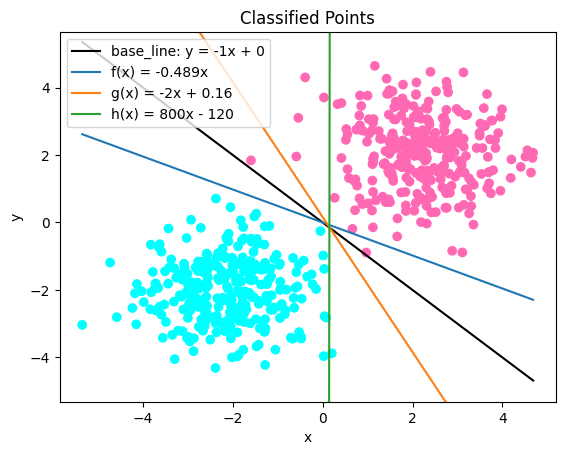

Differences in classification compared to base_line:
f(x): 1 points differ
g(x): 1 points differ
h(x): 6 points differ

Count of pink (1) vs cyan (0) classifications:
base_line: 302 pink points out of 600
f(x): 301 pink points out of 600
g(x): 301 pink points out of 600
h(x): 298 pink points out of 600


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Läs in CSV-fil med koordinater
points = pd.read_csv("unlabelled_data.csv", names=["x", "y"])

# Extrahera x- och y-värden som numpy-arrayer
x_vals = points["x"].values
y_vals = points["y"].values

# Totalt antal datapunkter
num_points = len(points)

# Klassificeringsfunktion: returnerar 1 om ovanför linjen, annars 0
# Parametern 'flip' används för linjer med positiv lutning
def classify(y_true, y_pred, flip=False):
    if flip:
        return int(y_true < y_pred)
    return int(y_true > y_pred)


# Definiera linjära funktioner som ska jämföras
def y_line(x):
    return -1 * x + 0

def f_line(x):
    return -0.489 * x

def g_line(x):
    return -2 * x + 0.16

def h_line(x):
    return 800 * x - 120


# Klassificera alla punkter för varje linje
points["label_y"] = [classify(y_vals[i], y_line(x_vals[i])) for i in range(num_points)]
points["label_f"] = [classify(y_vals[i], f_line(x_vals[i])) for i in range(num_points)]
points["label_g"] = [classify(y_vals[i], g_line(x_vals[i])) for i in range(num_points)]
points["label_h"] = [classify(y_vals[i], h_line(x_vals[i]), flip=True) for i in range(num_points)]


# Färgkodning baserat på huvudklassificeringen
colors = ["hotpink" if val == 1 else "cyan" for val in points["label_y"]]
x_range = np.array([points["x"].min(), points["x"].max()])

# Rita alla punkter och linjer
plt.scatter(points["x"], points["y"], c=colors)
plt.plot(x_range, y_line(x_range), color="black", label="base_line: y = -1x + 0")
plt.plot(x_range, f_line(x_range), label="f(x) = -0.489x")
plt.plot(x_range, g_line(x_range), label="g(x) = -2x + 0.16")
plt.plot(x_range, h_line(x_range), label="h(x) = 800x - 120")
plt.ylim(points["y"].min() - 1, points["y"].max() + 1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Classified Points")
plt.legend()
plt.show()


# Funktion för att visualisera klassificering för valfri linje
def visualize_line(line_func, label_col, line_name, col="black"):
    color_map = ["hotpink" if v == 1 else "cyan" for v in points[label_col]]
    plt.scatter(x_vals, y_vals, c=color_map)
    plt.plot(x_range, line_func(x_range), color=col, label=line_name)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Classification using {line_name}")
    plt.ylim(points["y"].min() - 1, points["y"].max() + 1)
    plt.legend()
    plt.show()


# Jämför skillnader i klassificeringar
print("Differences in classification compared to base_line:")
print(f"f(x): {np.sum(points['label_f'] != points['label_y'])} points differ")
print(f"g(x): {np.sum(points['label_g'] != points['label_y'])} points differ")
print(f"h(x): {np.sum(points['label_h'] != points['label_y'])} points differ")

# Summering av antal rosa punkter per linje
print("\nCount of pink (1) vs cyan (0) classifications:")
print(f"base_line: {np.sum(points['label_y'])} pink points out of {num_points}")
print(f"f(x): {np.sum(points['label_f'])} pink points out of {num_points}")
print(f"g(x): {np.sum(points['label_g'])} pink points out of {num_points}")
print(f"h(x): {np.sum(points['label_h'])} pink points out of {num_points}")




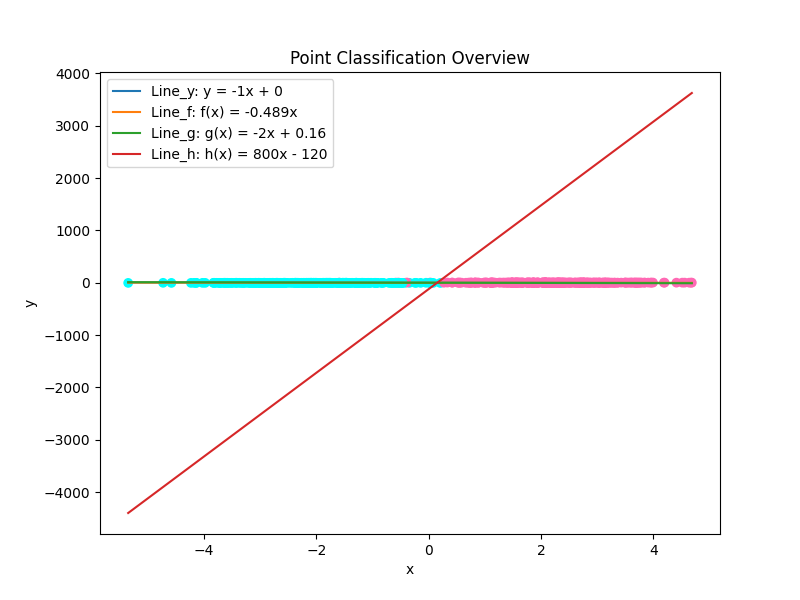

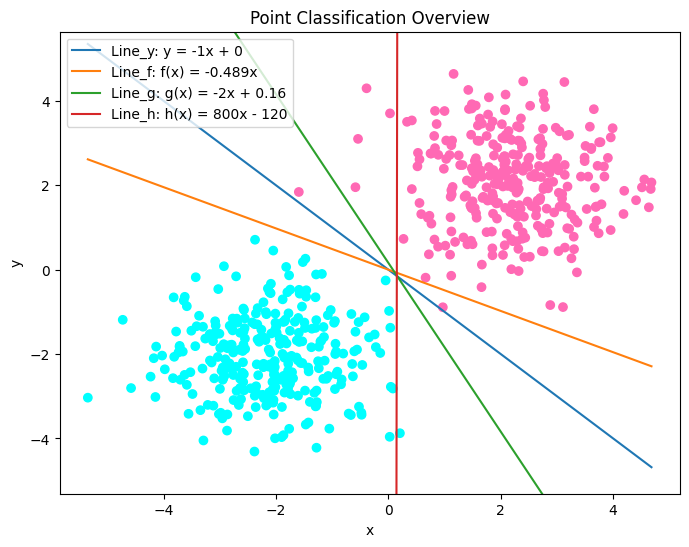

Differences in classification relative to Line_y
Line_f: 1 points differ from Line_y
Line_g: 1 points differ from Line_y
Line_h: 6 points differ from Line_y

Count of above (pink) points per line
Line_y: 302 pink points out of 600
Line_f: 301 pink points out of 600
Line_g: 301 pink points out of 600
Line_h: 298 pink points out of 600


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import base64
from io import BytesIO

# Läs in CSV-fil med koordinater 
df = pd.read_csv("unlabelled_data.csv", names=["x_val", "y_val"])
n_total = len(df)

#  Funktion för att avgöra om punkt ligger ovanför eller under en linje 
def is_above(y_point, y_line, flip_sign=False):
    return int(y_point < y_line) if flip_sign else int(y_point > y_line)

#  Samling av linjära funktioner i dictionary 
lines = {
    "Line_y": {"expr": lambda x: -1 * x, "invert": False, "label": "Line_y: y = -1x + 0"},
    "Line_f": {"expr": lambda x: -0.489 * x, "invert": False, "label": "Line_f: f(x) = -0.489x"},
    "Line_g": {"expr": lambda x: -2 * x + 0.16, "invert": False, "label": "Line_g: g(x) = -2x + 0.16"},
    "Line_h": {"expr": lambda x: 800 * x - 120, "invert": True, "label": "Line_h: h(x) = 800x - 120"},}

#  Klassificera punkter för varje linje 
for key, info in lines.items():
    df[f"cls_{key}"] = df.apply(lambda row: is_above(row["y_val"], info["expr"](row["x_val"]), flip_sign=info["invert"]),axis=1)

# Färgkarta baserat på första linjens klassificering 
colors = np.where(df["cls_Line_y"] == 1, "hotpink", "cyan")

# Rita punkterna och alla linjer 
x_limits = np.array([df["x_val"].min(), df["x_val"].max()])

plt.figure(figsize=(8, 6))
plt.scatter(df["x_val"], df["y_val"], c=colors)

for key, info in lines.items():
    plt.plot(x_limits, info["expr"](x_limits), label=info["label"])

plt.xlabel("x")
plt.ylabel("y")
plt.title("Point Classification Overview")
plt.legend()
# --- Skapa base64-bild och skriv ut Markdown-raden ---
import base64
from io import BytesIO

buf = BytesIO()
plt.savefig(buf, format="png")  # spara bilden i minnet innan show()
buf.seek(0)
img_base64 = base64.b64encode(buf.read()).decode("utf-8")
buf.close()

print(f"![graf](data:image/png;base64,{img_base64})")

plt.ylim(df["y_val"].min() - 1, df["y_val"].max() + 1)
plt.show()


# Funktion för att rita en specifik linje med dess färgning
def display_line(line_key, color_line="black"):
    labels = df[f"cls_{line_key}"]
    color_map = ["hotpink" if val == 1 else "cyan" for val in labels]
    plt.scatter(df["x_val"], df["y_val"], c=color_map)
    plt.plot(x_limits, lines[line_key]["expr"](x_limits), color=color_line, label=lines[line_key]["label"])
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Classification using {line_key}")
    plt.legend()
    plt.ylim(df["y_val"].min() - 1, df["y_val"].max() + 1)
    plt.show()


# Utskrifter av klassificeringsjämförelser
print("Differences in classification relative to Line_y")
for other in ["Line_f", "Line_g", "Line_h"]:
    diff_count = np.sum(df[f"cls_{other}"] != df["cls_Line_y"])
    print(f"{other}: {diff_count} points differ from Line_y")

print("\nCount of above (pink) points per line")
for key in lines.keys():
    total_pink = np.sum(df[f"cls_{key}"])
    print(f"{key}: {total_pink} pink points out of {n_total}")



